In [1]:
# Importing modules
import numpy as np
from matplotlib import pyplot as plt
import os
import datetime
import timeit
import time
import pickle
from statistics import mean 
from os.path import dirname as up
print("ok")

# setting path to data
repo_path = os.getcwd()

# functions to use:
def get_pickle_path(repo_path):
    two_up_path = up(up(repo_path))
    python_file_path = os.path.join(two_up_path, "Python")
    pickle_path = os.path.join(python_file_path, "Pickle_data") 
    return pickle_path

def round_done(repo_path):
    os.chdir(repo_path)
    print("done")

def plotting_saving(t,x,start_time,plt_num):
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime('plt'+plt_num+' - ch?, bad documentation : %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_plt"+plt_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
    
def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()
        
# save_to_path = os.path.join(repo_path, "figs")
# os.chdir(save_to_path)

print("done")
# go back to original directory
os.chdir(repo_path)
# print( os.getcwd())

ok
done


2
4
done
160662 15.08319


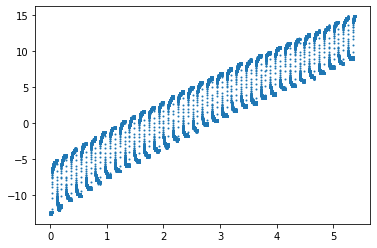

5.383537931074416 323.012275864465


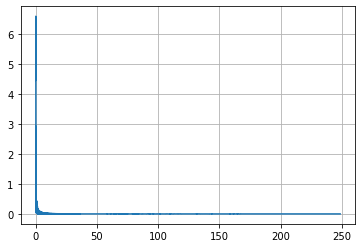

In [9]:
# 20200913_1601
time_stamps = []

# set path to get data
pickle_path = get_pickle_path(repo_path)
os.chdir(pickle_path)

# get data
file_name = 'data_200913n1600.pickle'
# list_of_files_yet_to_open.remove(file_name)
f = open(file_name,'rb')
scope_data = pickle.load(f)
# print(scope_data)
# print(len(scope_data))

def plotting_saving_ch(t,x,start_time,ch_num,ch_name):
    # change to saving-directory
    save_to_path = os.path.join(repo_path, "figs")
    os.chdir(save_to_path)
    #
    add_the_time = datetime.datetime.fromtimestamp(start_time).strftime('%Y%m%d_%H%M')
    print(add_the_time)
    plt.title(datetime.datetime.fromtimestamp(start_time).strftime(ch_num+', '+ch_name+ ': %Y-%m-%d, at %H:%M:%S'))
    plt.xlabel('time [min]')
    plt.ylabel('[Volt]]')
    plt.scatter(t, x,s = 1)
    save_name = "fig_"+add_the_time+"_"+ch_num+"_min"
    plt.savefig(save_name ,bbox_inches='tight')
    plt.show()

n = 0
with open(file_name, 'rb') as handle:
        try:
            while True:
                temp_array = pickle.load(handle)
                print(len(temp_array))
                if len(temp_array) == 2:
                    start_time = temp_array[0][0]
                    t = temp_array[0][1:]
                    x = temp_array[1]
                    plt_num = n
                    ch_num = 'ch1'
                    ch_name ='amplified signal'
#                     plotting_saving_ch(t,x,start_time,ch_num,ch_name)
                    n=n+1
                    # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
#                 else:
#                     start_time = temp_array[0][0]
#                     t1 = temp_array[0][1:]
#                     x1 = temp_array[1]
#                     t2 = temp_array[2][1:]
#                     x2 = temp_array[3]
#                     # change to saving-directory
#                     save_to_path = os.path.join(repo_path, "figs")
#                     os.chdir(save_to_path)
#                     plt_num = str(n+1)
#                     plotting_saving(t1,x1,start_time,plt_num)
#                     plt_num = str(n+2)
#                     plotting_saving(t2,x2,start_time,plt_num)
#                     n = n+2
#                     # set path to get data
                    pickle_path = get_pickle_path(repo_path)
                    os.chdir(pickle_path)
        except EOFError:
            pass
        
round_done(repo_path)

idx = x.index(max(x))
print(x.index(max(x)),max(x))
plt.scatter(t[:idx], x[:idx],s = 1)
plt.show()

%matplotlib inline
# %matplotlib
import numpy as np
from scipy.fft import fft

t_vec = t[:idx]
t_vec_s = ([var*60 for var in t_vec]) #t vec in [seconds]
data_vec = x[:idx]

N = len(data_vec)
# N = Number of points

# sample spacing
dt = np.diff(t_vec_s)[0]
sample_rate = 1/dt

F_data = fft(data_vec)
F_frequency = np.linspace(0.0, 1.0/(2.0*dt), N//2)
print(t_vec[-1],t_vec_s[-1])

plt.plot(F_frequency, 2.0/N * np.abs(F_data[0:N//2]))
plt.grid()
plt.show()

def draw_fft(t_sec,x):
    N = len(x)
    dt = np.diff(t_sec)[2] #change this to an avg or mean at a later time.
    F_data = fft(x)
    F_frequency = np.linspace(0.0, 1.0/(2.0*dt), N//2)
    plt.plot(F_frequency, 2.0/N * np.abs(F_data[0:N//2]))
    f_data = 2.0/N * np.abs(F_data[0:N//2])
    plt.grid()
    plt.show()
    return F_frequency, f_data


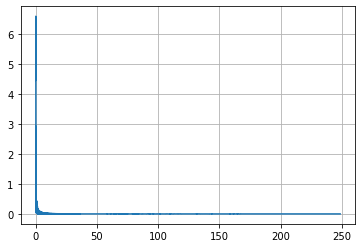

In [10]:
ft,xf = draw_fft(t_vec_s,data_vec)

plt.plot(F_frequency, x)
    plt.grid()
    plt.show()